Objectif
Il s’agit d’un ensemble de données contenant plus de 21613 maisons et leurs caractéristiques, 
l’objectif est de trouver le meilleur modèle pour prédire le prix d’une maison

Instructions

Explorez cet ensemble de données en utilisant ce que vous avez appris en matière de prétraitement et de visualisation des données
Rédigez un paragraphe en sélectionnant les caractéristiques les plus importantes (sélection des fonctionnalités).
Divisez votre jeu de données en un ensemble d’entraînement et un ensemble de tests.
Appliquez la régression linéaire à votre ensemble d’entraînement.
Tracez la régression linéaire.
Mesurez les performances de la régression linéaire à l’aide du jeu de tests.
Appliquez la régression multilinéaire et comparez-la au modèle linéaire.

# Importer les librairies necessaires

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from matplotlib.patches import Ellipse # Pour représenter le cercle de corrélation
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# CHARGER LE JEU DE DONNEE

In [64]:
df = pd.read_csv('kc_house_data.csv',index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [65]:
#copie du dataset
df2 = df.copy() 

In [66]:
df2['date'] = pd.to_datetime(df2['date'])
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipco

(21613, 20)

In [67]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [68]:
#recherche de valeurs manquantes
df2.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [69]:
#recherche de doublons
df2.duplicated().sum()

0

In [70]:
df2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

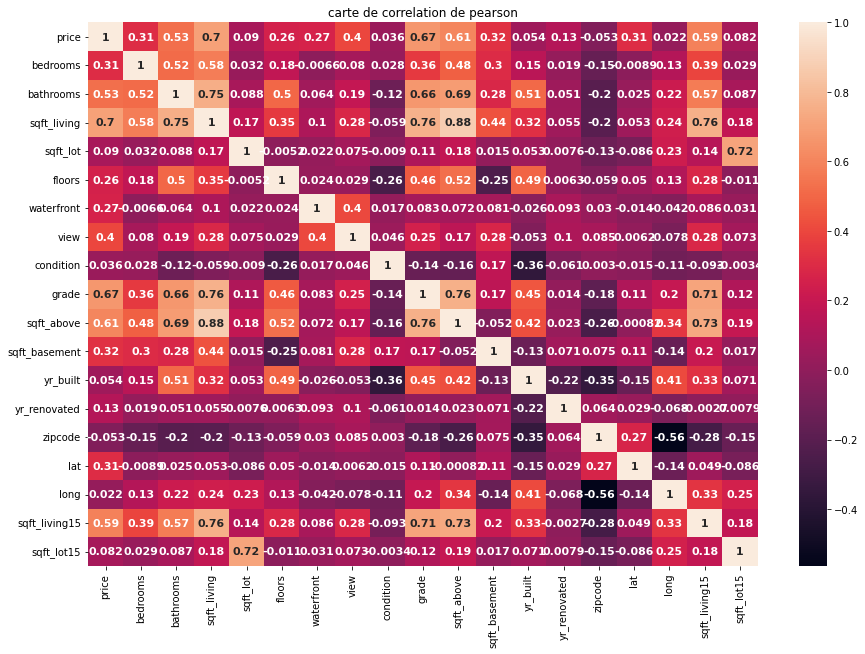

In [71]:
# Aperçu des corrélations entre variables
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.title('carte de correlation de pearson')
plt.show()

au vue de la carte de correlation de pearson 
0.70  est le coefficient de correlation le plus eleve  entre la variable price et une autre  variableen particulier  sqft_living,
d'ou le choix de cette variable pour application de notre regression lineaire.

# ANALYSE DE LA VARIABLE PRICE (PRIX)

In [72]:
# STats Descriptives
df2['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [73]:
df2['price'].mode()

0    350000.0
1    450000.0
dtype: float64

In [74]:
np.var(df2['price'])

134776142225.57248

# ANALYSE DE LA VARIABLE sqft_living

In [75]:
# STats Descriptives
df2['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [76]:
df2['sqft_living'].mode()

0    1300
dtype: int64

In [77]:
np.var(df2['sqft_living'])

843494.6523725768

# Visualisation du Modele que suivent nos variables(price et sqft_living )

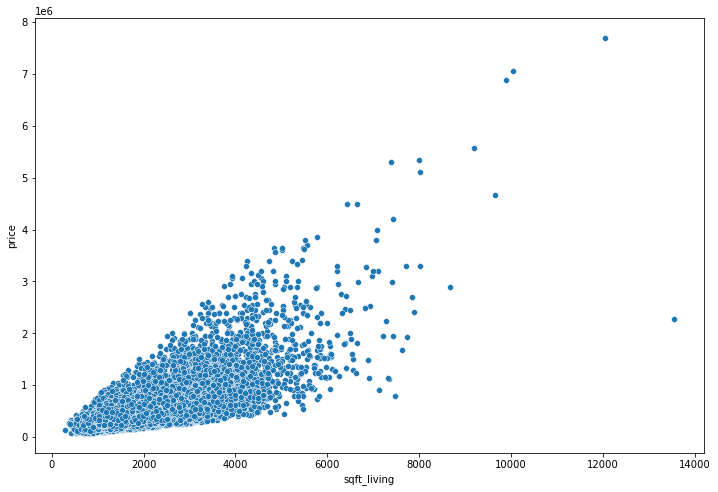

In [79]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df2, x= 'sqft_living', y= 'price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

# Application d'une regression lineaire

coefficient of determination: 0.4928532179037931
intercept: -43580.74309447396
coef: [280.6235679]


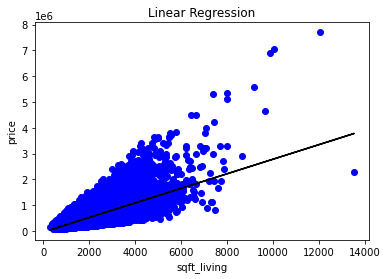

In [85]:
x=df2["sqft_living"].values[:,np.newaxis]
y=df2["price"].values

#diviser le jeu de donnee 20% pour le test et 80% pour l'entrainement 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
model = LinearRegression().fit(x, y) # construire un modèle de régression linéaire
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coef:', model.coef_)
model.fit(x_train,y_train)  #Appliquez la régression linéaire à votre ensemble d’entraînement
plt.scatter(x,y,color="b")
#Tracez la régression linéaire
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

L’expression de cette régression sera exprimée comme suit :

In [81]:
y = -43580.74 + 280.62 * x

In [86]:
# Mesurez les performances de la régression linéaire à l’aide du jeu de tests.
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64179676631.68388
R squared 0.4879814110728805


Avec R squared : 0.48 la regression  lineaire est bonne mais le modele ne peut predire le prix des maisons en trenant en compte qu'une seule variable

# Appliquez la régression multilinéaire 

In [91]:
x=df2[["sqft_living",'grade','sqft_above','sqft_living15','bathrooms','sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long']]
y=df2["price"].values

#diviser le jeu de donnee 20% pour le test et 80% pour l'entrainement 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
model = LinearRegression().fit(x, y) # construire un modèle de régression linéaire
model.fit(x_train,y_train)  #Appliquez la régression linéaire à votre ensemble d’entraînement
predicted=model.predict(x_test) # Mesurez les performances de la régression linéaire à l’aide du jeu de tests.
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 35917621557.70499
R squared 0.7134530606451284


In [ ]:
Avec R squared : 0.71 indique que l'ajustement de la régression est parfait.